In [1]:
#Importing Libraries
from numpy.random import randn
from numpy.random import seed
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Dataset
url='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'

In [3]:
#Create a dataframe
df=pd.read_csv(url)

In [4]:
df.shape

(494020, 42)

In [5]:
# The CSV file has no column heads, so add them
df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]

In [7]:
#Checking if columns are added
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [8]:
#Observing dataset
df[0:5]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


Two Categorical - Chi-Square Test

In [9]:
#Categorizing the types of attacks under one variable
df=df.replace(to_replace =["ipsweep.","portsweep.","nmap.","satan.","ftp_write.", "guess_passwd.","imap.","multihop.","phf.","spy.", "warezclient.","warezmaster.","buffer_overflow.","loadmodule.","perl.", "rootkit.","back.", "land." , "neptune.", "pod.","smurf.","teardrop."],value="attack")

In [10]:
df.groupby("outcome")['outcome'].count()

outcome
attack     396743
normal.     97277
Name: outcome, dtype: int64

In [11]:
#Creating sample dataset
sample1=df.sample(frac=0.1,replace=False)

In [12]:
sample1

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
129188,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,attack
195006,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,attack
80514,0,tcp,http,SF,281,4500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,10,0.0,0.0,0.0,0.0,1.00,0.00,0.0,158,255,1.00,0.00,0.01,0.01,0.0,0.00,0.0,0.0,normal.
288906,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,attack
25497,0,tcp,http,SF,213,479,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12,12,0.0,0.0,0.0,0.0,1.00,0.00,0.0,34,255,1.00,0.00,0.03,0.03,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219204,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,attack
95698,0,icmp,ecr_i,SF,1032,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,508,508,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,255,1.00,0.00,1.00,0.00,0.0,0.00,0.0,0.0,attack
146366,5287,udp,other,SF,147,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,255,1,0.00,0.55,0.87,0.00,0.0,0.00,0.0,0.0,normal.
104413,0,tcp,smtp,SF,1247,333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,204,101,0.50,0.03,0.00,0.00,0.0,0.01,0.0,0.0,normal.


In [13]:
#Creating table for finding relation between service, and outcome
table1=pd.crosstab(sample1.service,sample1.outcome)

In [14]:
table1

outcome,attack,normal.
service,,
IRC,1,4
Z39_50,3,0
auth,10,26
bgp,12,0
courier,10,0
...,...,...
urp_i,0,54
uucp,11,0
uucp_path,15,0


In [15]:
#Importing chi2 model
from scipy.stats import chi2_contingency

In [16]:
#Analyzing table1
stat, p, dof, expected=chi2_contingency(table1)

In [17]:
#Printing values
print(stat)
print(p)
print(dof)
print(expected)

41596.58736569147
0.0
60
[[4.00935185e+00 9.90648152e-01]
 [2.40561111e+00 5.94388891e-01]
 [2.88673333e+01 7.13266669e+00]
 [9.62244444e+00 2.37755556e+00]
 [8.01870370e+00 1.98129630e+00]
 [3.20748148e+00 7.92518522e-01]
 [5.61309259e+00 1.38690741e+00]
 [8.82057407e+00 2.17942593e+00]
 [9.62244444e+00 2.37755556e+00]
 [8.01870370e+00 1.98129630e+00]
 [4.71499777e+02 1.16500223e+02]
 [1.04243148e+01 2.57568519e+00]
 [1.33110481e+02 3.28895186e+01]
 [2.26760922e+04 5.60290782e+03]
 [5.61309259e+00 1.38690741e+00]
 [8.82057407e+00 2.17942593e+00]
 [4.65084814e+01 1.14915186e+01]
 [6.09421481e+01 1.50578519e+01]
 [3.64851018e+02 9.01489818e+01]
 [3.20748148e+00 7.92518522e-01]
 [8.82057407e+00 2.17942593e+00]
 [5.23781725e+03 1.29418275e+03]
 [4.00935185e+00 9.90648152e-01]
 [7.21683333e+00 1.78316667e+00]
 [5.61309259e+00 1.38690741e+00]
 [4.81122222e+00 1.18877778e+00]
 [8.01870370e+00 1.98129630e+00]
 [8.01870370e+00 1.98129630e+00]
 [7.21683333e+00 1.78316667e+00]
 [6.41496296e+00 1

In [18]:
#Defining alpha
alpha=0.05

In [19]:
#Hypothesis Testing
if p<=alpha:
  print("Dependent:Reject H0")
else:
  print("Independent:Fail to Reject H0")

Dependent:Reject H0


One Categorical - One Proportional Test

In [20]:
#Importing Libraries
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
#Finding frequency
sample1.outcome.value_counts()

attack     39614
normal.     9788
Name: outcome, dtype: int64

In [22]:
stat4, p4 = proportions_ztest(sample1.outcome.value_counts(),39613)

In [23]:
#Printing Values
print(stat4)
print(p4)

218.7125314716374
0.0


In [24]:
#Hypothesis Testing
if p4<=alpha:
  print("Reject H0")
else:
  print("Accept H0")

Reject H0


One Continuous Variable - T Test

In [25]:
#Importing ttest module
from scipy.stats import ttest_1samp

In [26]:
#Finding mean of duration from sample dataset
np.mean(sample1.duration)

47.88045018420307

In [28]:
stat1,p1=ttest_1samp(sample1.duration,51.25)

In [29]:
print(stat1)
print(p1)

-1.0657219194750827
0.2865545744587705


In [30]:
#Hypothesis Testing
if p1<=alpha:
  print("Reject H0")
else:
  print("Accept H0")

Accept H0


Two Numerical Variable - Correlation Test

In [31]:
#Importing pearsonr model
from scipy.stats import pearsonr

In [33]:
corr,p2=pearsonr(sample1.src_bytes,sample1.dst_bytes)

In [34]:
#Printing Values
print(corr)
print(p2)

0.0002585561589144849
0.9541734410400826


In [35]:
#Hypothesis Testing
if p2<= alpha:
  print("Some Correlation:Reject H0")
else:
  print("Don't have Correlation: Accept H0")

Don't have Correlation: Accept H0


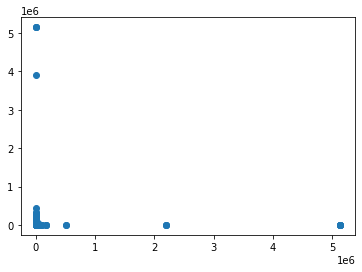

In [36]:
plt.scatter(sample1.src_bytes,sample1.dst_bytes)

There is no linear relationship between dst_bytes and src_bytes.

One Numerical and One Categorical - Anova Test

In [37]:
#Importing Libraries
from scipy.stats import f_oneway

In [38]:
stat3,p3=f_oneway(sample1.land,sample1.flag.value_counts())

In [39]:
print(stat3)
print(p3)

10696.169141242772
0.0


In [40]:
#Hypothesis Testing
if p<=alpha:
  print("Dependent:Reject H0")
else:
  print("Independent:Fail to Reject H0")

Dependent:Reject H0


Conclusion: In this lab, we learnt to apply one proportion test, chi square test, t test, correlation test and Anova test on categorical and numerical variables.